In [1]:
import matplotlib.pyplot as plt
import pandas as pd 


In [45]:
data= pd.read_csv('datapropertyd12.csv')

In [46]:
data

,date_added,baths,area_marla,area_sqft,bedrooms,price
0,8/8/2018,0,20.0,5445.02,3,70000000
1,8/8/2018,3,20.0,5445.02,4,75000000
2,8/8/2018,4,20.0,5445.02,4,75000000
3,9/7/2018,2,4.0,1089.00,2,16500000
4,9/7/2018,5,10.0,2722.51,5,21000000
...,...,...,...,...,...,...
287,7/23/2019,0,8.0,2178.01,0,35000000
288,7/24/2019,0,14.0,3811.51,0,55000000
289,7/24/2019,5,5.0,1361.25,6,26500000
290,7/24/2019,11,10.0,2722.51,10,4


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_added  292 non-null    object 
 1   baths       292 non-null    int64  
 2   area_marla  292 non-null    float64
 3   area_sqft   292 non-null    float64
 4   bedrooms    292 non-null    int64  
 5   price       292 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 13.8+ KB


In [49]:
from pandas.io.formats.info import DataFrameTableBuilder
# Convert Month into Datetime
data['date_added']=pd.to_datetime(data['date_added'])
data.set_index('date_added',inplace=True)

In [50]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 2018-08-08 to 2019-07-24
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   baths       292 non-null    int64  
 1   area_marla  292 non-null    float64
 2   area_sqft   292 non-null    float64
 3   bedrooms    292 non-null    int64  
 4   price       292 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 13.7 KB


In [52]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [53]:
X

,baths,area_marla,area_sqft,bedrooms
date_added,,,,
2018-08-08,0,20.0,5445.02,3
2018-08-08,3,20.0,5445.02,4
2018-08-08,4,20.0,5445.02,4
2018-09-07,2,4.0,1089.00,2
2018-09-07,5,10.0,2722.51,5
...,...,...,...,...
2019-07-23,0,8.0,2178.01,0
2019-07-24,0,14.0,3811.51,0
2019-07-24,5,5.0,1361.25,6


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [55]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [56]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[07:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [57]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 18417902.426027


In [58]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [59]:
data_dmatrix

In [60]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[07:34:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:34:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:34:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [61]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,3.416865e+07,705305.937971,3.428912e+07,1.506850e+06
1,3.153331e+07,297423.981415,3.188870e+07,1.756840e+06
2,2.891507e+07,480684.207529,2.937098e+07,1.768607e+06
3,2.654349e+07,188959.947053,2.709363e+07,1.738049e+06
4,2.441928e+07,568645.393597,2.505174e+07,1.719557e+06


In [62]:
print((cv_results["test-rmse-mean"]).tail(1))

49    8637445.0
Name: test-rmse-mean, dtype: float64


In [63]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[07:36:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


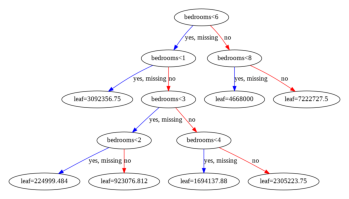

In [64]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

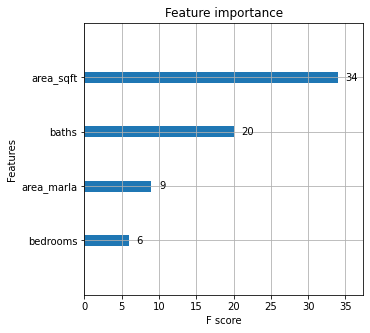

In [66]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [4, 5]
plt.show()